<a href="https://colab.research.google.com/github/MagalyCabrera8/TAM-2025-2/blob/main/EjercicioParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO PARCIAL





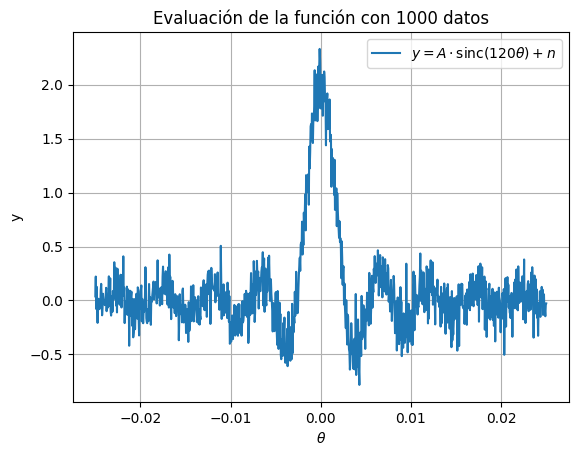

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

# Parámetros
A = 2   # Amplitud
# Generar vector de 100 valores de θ entre -0.01 y 0.01
teta = np.linspace(-0.025, 0.025, 1000)

media_ruido = 0.0  # media del ruido gaussiano



#función cálculo varianza del ruido a partir del snr dB
def var_snr(x,snrdB): #x vector de datos (señal), snrdB SNR en dB
    Px = np.mean(x**2)#estimador potencia media de la señal
    return Px/(10**(snrdB/10))


y = A * np.sinc(2*pi*60 * teta) #y sin ruido
snrdB = 10 #ruido según SNR dB
sigma_ruido = var_snr(y, snrdB) # desviación estándar del ruido
ruido=np.sqrt(var_snr(y,snrdB))*np.random.randn(len(teta))

# Evaluar la función usando np.sinc
y = A * np.sinc(2*pi*60 * teta) + ruido


# --- Graficar ---
plt.plot(teta, y, label=r"$y = A \cdot \mathrm{sinc}(120\theta) + n$")
plt.title("Evaluación de la función con 1000 datos")
plt.xlabel(r"$\theta$")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

In [45]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



Q = 2
kf = KFold(n_splits=2, shuffle=True, random_state=42)

mse_train, mse_test = [], []

for fold, (train_i, test_i) in enumerate(kf.split(teta), 1):
    # Representación polinómica (¡sin fuga de información!)
    phi = PolynomialFeatures(degree=Q, include_bias=True)
    Phi_train = phi.fit_transform(teta[train_i].reshape(-1, 1))
    Phi_test  = phi.transform(teta[test_i].reshape(-1, 1))

    reg = Ridge(alpha=1e-3)
    reg.fit(Phi_train, y[train_i]) # Use 'y' instead of 't'

    y_tr = reg.predict(Phi_train)
    y_te = reg.predict(Phi_test)

    mse_train.append(mean_squared_error(y[train_i], y_tr)) # Use 'y' instead of 't'
    mse_test.append(mean_squared_error(y[test_i], y_te)) # Use 'y' instead of 't'



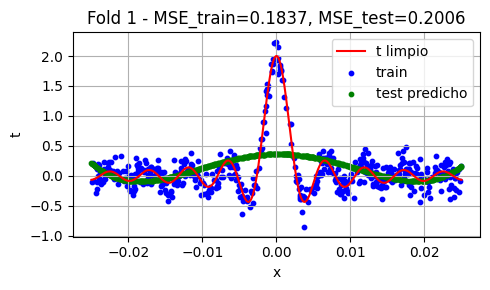

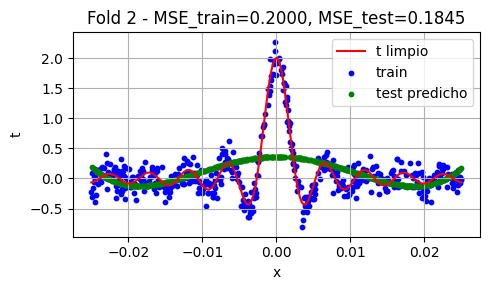

MSE_train promedio: 0.19184477728226018
MSE_test promedio: 0.19252059149261852


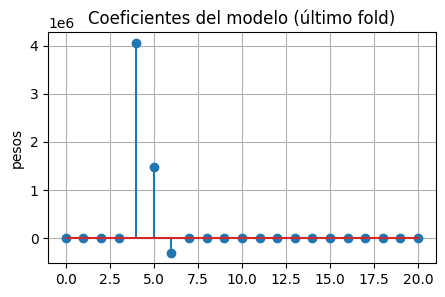

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# =======================
# 1) Datos con ruido (igual que antes)
# =======================
A = 2
teta = np.linspace(-0.025, 0.025, 1000)

def var_snr(x, snrdB):
    Px = np.mean(x**2)
    return Px/(10**(snrdB/10))

tt = A * np.sinc(2*pi*60 * teta)  # señal limpia
snrdB = 10
ruido = np.sqrt(var_snr(tt, snrdB)) * np.random.randn(len(teta))
y = tt + ruido

X = teta
t = y

# =======================
# 2) Cross-validation con KFold
# =======================
Q = 20
lambdaR = 1e-15

kf = KFold(n_splits=2, shuffle=True, random_state=42)

mse_train, mse_test = [], []

for fold, (train_i, test_i) in enumerate(kf.split(X), 1):
    phiQ = PolynomialFeatures(degree=Q)
    Phi = phiQ.fit_transform(X.reshape(-1, 1))

    reg_mc = Ridge(alpha=lambdaR)
    reg_mc.fit(Phi[train_i], t[train_i])

    y_tr = reg_mc.predict(Phi[train_i])
    y_te = reg_mc.predict(Phi[test_i])

    mse_train.append(mean_squared_error(t[train_i], y_tr))
    mse_test.append(mean_squared_error(t[test_i], y_te))

    # --- Gráfica por fold ---
    plt.figure(figsize=(5,3))
    plt.plot(X, tt, c='r', label='t limpio')
    plt.scatter(X[train_i], t[train_i], c='b', s=10, label='train')
    plt.scatter(X[test_i], y_te, c='g', s=10, label='test predicho')
    plt.title(f"Fold {fold} - MSE_train={mse_train[-1]:.4f}, MSE_test={mse_test[-1]:.4f}")
    plt.xlabel('x')
    plt.ylabel('t')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# =======================
# 3) Resumen
# =======================
print("MSE_train promedio:", np.mean(mse_train))
print("MSE_test promedio:", np.mean(mse_test))

plt.figure(figsize=(5,3))
plt.stem(reg_mc.coef_)
plt.ylabel('pesos')
plt.title('Coeficientes del modelo (último fold)')
plt.grid(True)
plt.show()

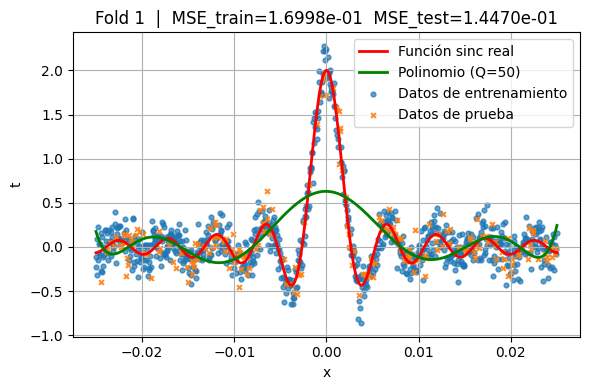

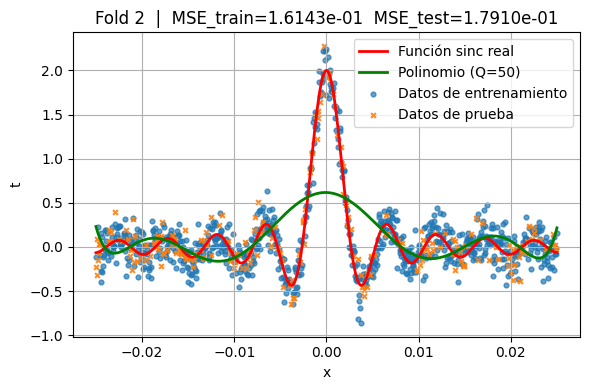

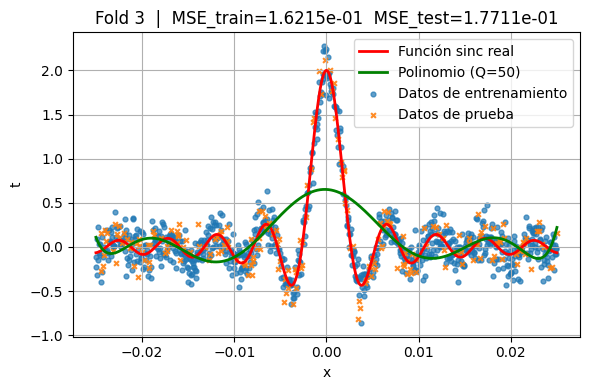

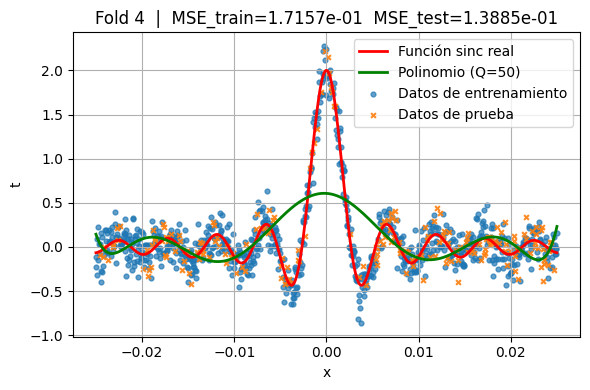

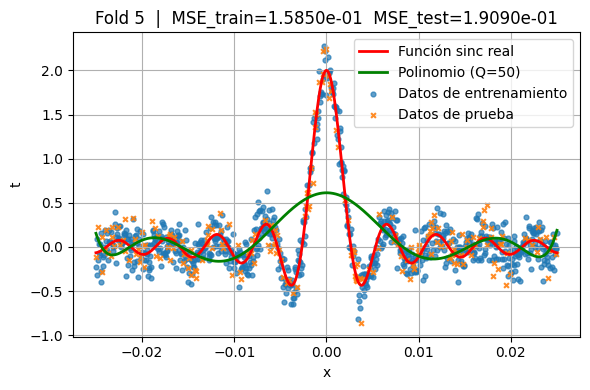

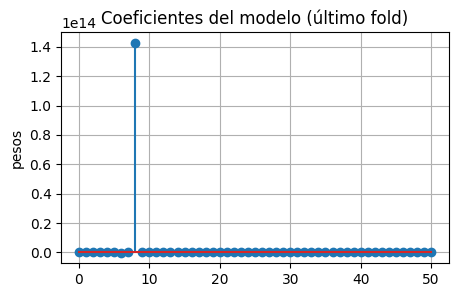

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# --- Supone que ya tienes definidos: X = teta, t = y (con ruido), tt (sinc real) ---

Q = 50
lambdaR = 1e-100
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_train, mse_test = [], []

for fold, (train_i, test_i) in enumerate(kf.split(X), 1):
    # Base polinómica (sin fuga: ajustar con train y transformar test)
    phiQ = PolynomialFeatures(degree=Q, include_bias=True)
    Phi = phiQ.fit_transform(X.reshape(-1, 1))           # para graficar el polinomio en TODO X
    Phi_train = Phi[train_i]
    Phi_test  = Phi[test_i]

    # Modelo
    reg_mc = Ridge(alpha=lambdaR)
    reg_mc.fit(Phi_train, t[train_i])

    # Predicciones
    y_tr = reg_mc.predict(Phi_train)
    y_te = reg_mc.predict(Phi_test)
    y_poly = reg_mc.predict(Phi)                          # polinomio sobre todo X (línea suave)

    mse_train.append(mean_squared_error(t[train_i], y_tr))
    mse_test.append(mean_squared_error(t[test_i], y_te))

    # -------- Gráfica solicitada --------
    plt.figure(figsize=(6,4))
    # función sinc real
    plt.plot(X, tt, 'r', linewidth=2, label='Función sinc real')
    # polinomio (ajuste)
    plt.plot(X, y_poly, 'g', linewidth=2, label=f'Polinomio (Q={Q})')
    # datos de entrenamiento
    plt.scatter(X[train_i], t[train_i], s=12, alpha=0.7, label='Datos de entrenamiento')
    # datos de prueba
    plt.scatter(X[test_i], t[test_i], s=12, alpha=0.9, marker='x', label='Datos de prueba')

    plt.title(f'Fold {fold}  |  MSE_train={mse_train[-1]:.4e}  MSE_test={mse_test[-1]:.4e}')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



plt.figure(figsize=(5,3))
plt.stem(reg_mc.coef_)
plt.ylabel('pesos')
plt.title('Coeficientes del modelo (último fold)')
plt.grid(True)
plt.show()
